# Load Libraries

In [2]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')



In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\Shwet Bhagat\Desktop\calorie_proct\calories.csv")
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [4]:
# Display structure and summary report.
print("Dataset Structure:\n")
df.info()

print("\n Summary Report:\n")     
print(df.describe())

Dataset Structure:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB

 Summary Report:

            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     

In [5]:
# check for null values
print("Null values in Dataset:\n")
df.isnull().sum()

Null values in Dataset:



User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# EDA (Exploratory Data Analysis)

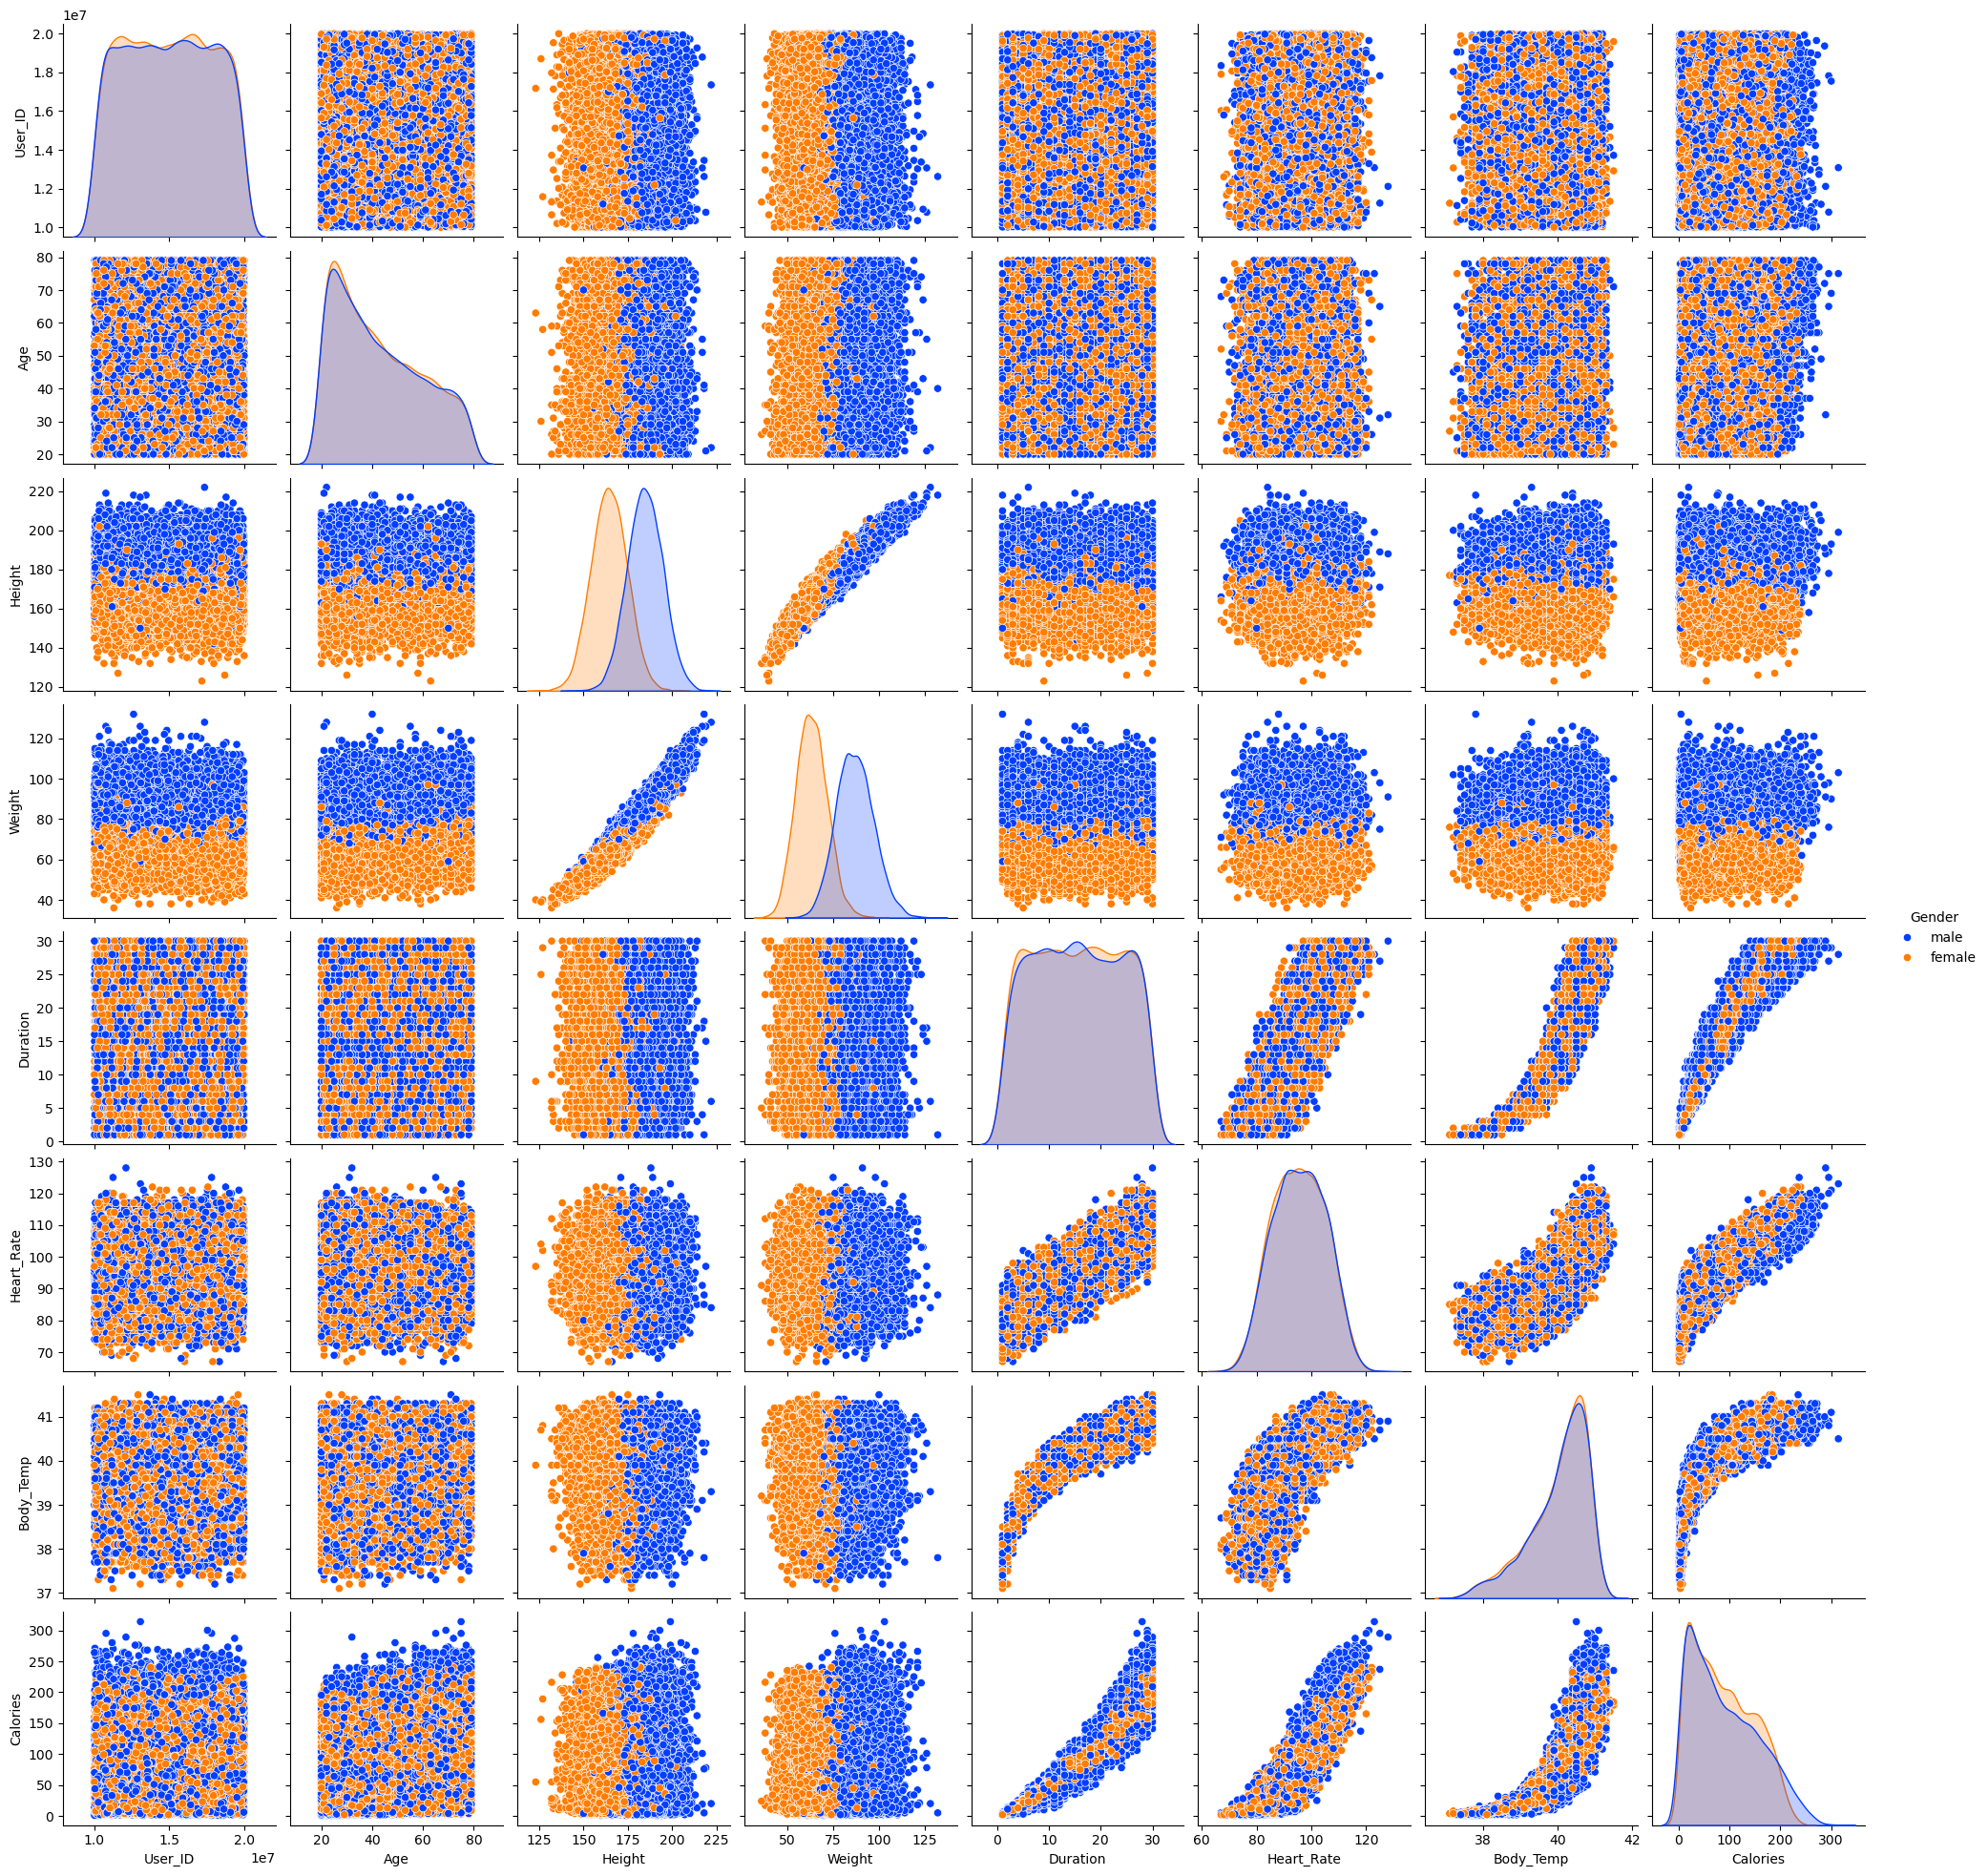

In [6]:
# pairplot
sns.pairplot(df,hue="Gender", palette="bright")    
plt.show()

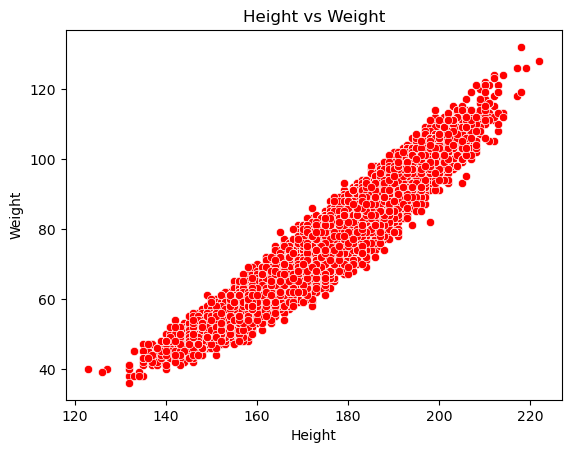

In [7]:
# scatterplot of Height and Weight
sns.scatterplot(x="Height",y="Weight",data=df,color="red")
plt.title("Height vs Weight")
plt.show()


1) X-axis (horizontal): Represents height, ranging from 120 to 220.

2) Y-axis (vertical): Represents weight, ranging from 40 to 130.

Each red dot signifies an individual data point. Overall, the graph shows a positive correlation between height and weight, meaning that as height increases, weight tends to increase too.

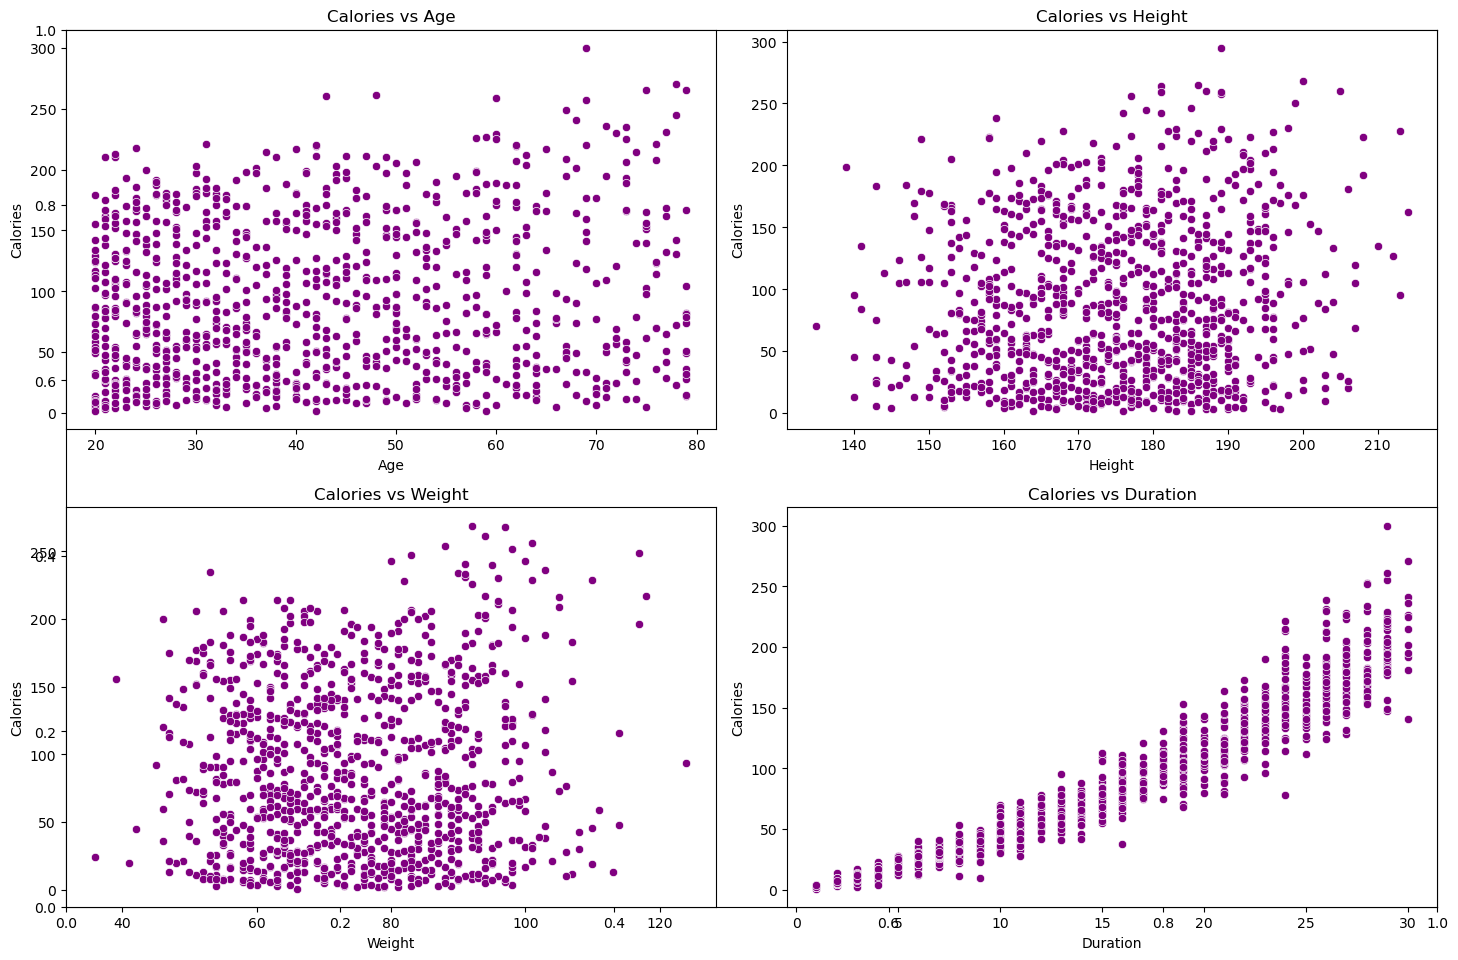

In [8]:
# scatterplot
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = df.sample(1000)
    sns.scatterplot(x=col, y='Calories', data=x,color="purple")
    plt.title(f"Calories vs {col}")
plt.tight_layout()
plt.show()

higher is the duration of the workout higher will be the calories burnt. But except for that, we cannot observe any such relation between calories burnt and height or weight features.

Here we can observe some real-life observations:

1) The average height of the boys is higher than girls.

2) Also, the weight of the girls is lower than that of the boys.

3) For the same average duration of workout calories burnt by men is higher than that of women.

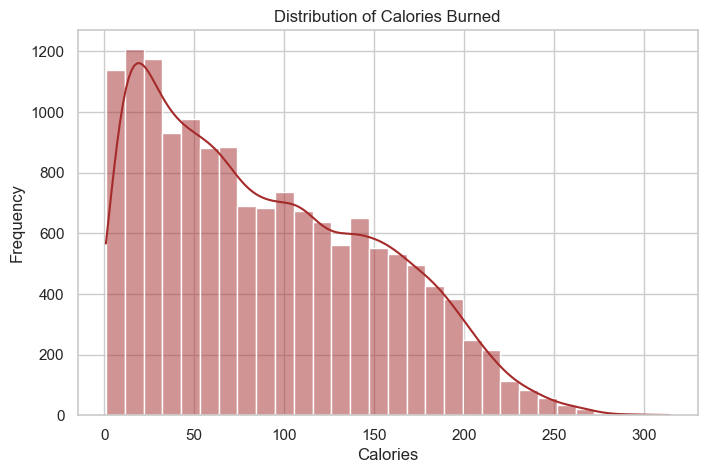

In [9]:
# Set plot style
sns.set(style="whitegrid")

# Plot distribution of Calories burned
plt.figure(figsize=(8, 5))
sns.histplot(df["Calories"], bins=30, kde=True, color="brown")
plt.title("Distribution of Calories Burned")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

Calories Distribution:

1) The distribution is right-skewed, meaning most people burn fewer calories (around 79 kcal), but a few burn significantly more.

2) The presence of a long tail suggests some outliers who burn exceptionally high calories.


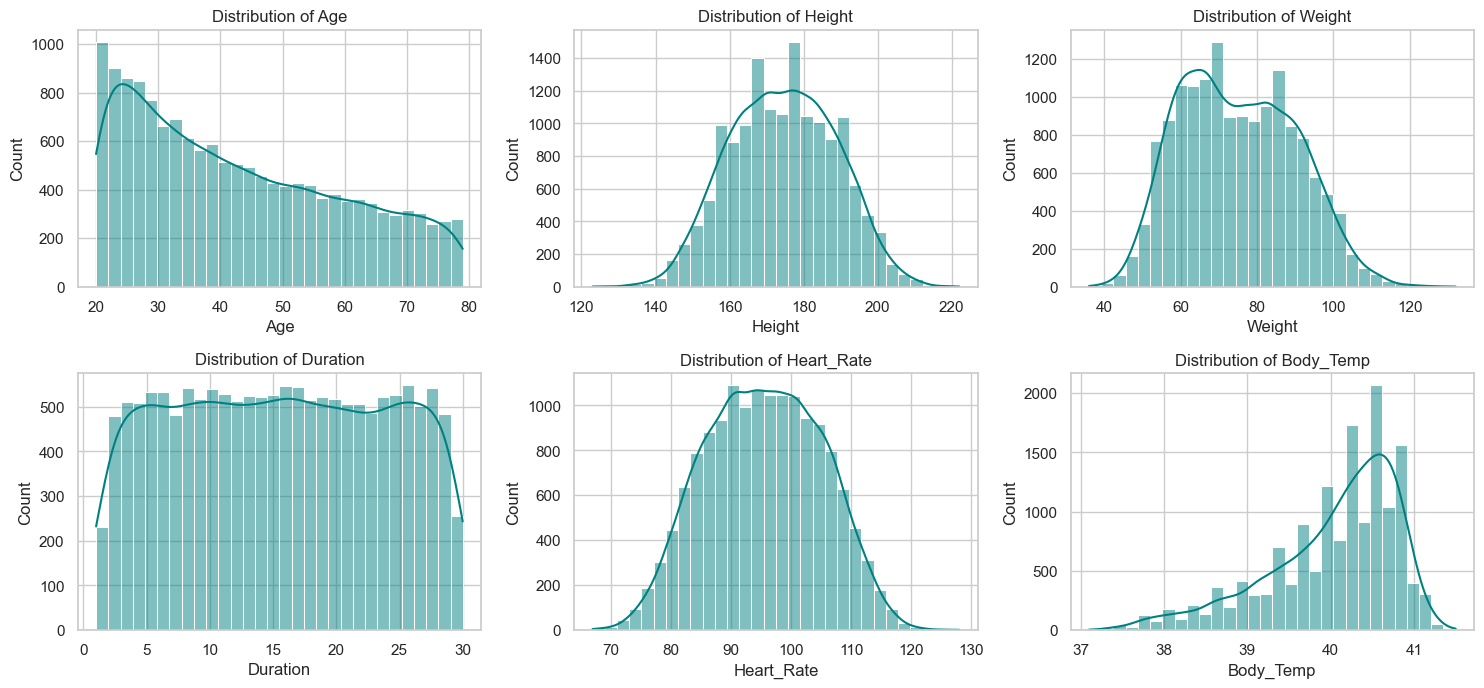

In [10]:
# Set plot style
sns.set(style="whitegrid")

# Set up figure size
plt.figure(figsize=(15, 10))

# List of numerical columns for univariate analysis
num_columns = ["Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp"]

# Plot histograms for each numerical column
for i, col in enumerate(num_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="teal")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


 Univariate Analysis:
1) Age: Slightly right-skewed, with most individuals in the 30-50 age range.
2) Height & Weight: Normally distributed, with some variations.
3) Duration: Right-skewed, as most workouts are short (less than 20 minutes).
4) Heart Rate: Appears normally distributed, centered around 95 bpm.
5) Body Temperature: Narrow range, mostly between 39°C to 41°C.

 

In [11]:
# Convert 'sex' and 'smoker' to binary values
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

In [12]:
df

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363       1   68   190.0    94.0      29.0       105.0       40.8   
1      14861698       0   20   166.0    60.0      14.0        94.0       40.3   
2      11179863       1   69   179.0    79.0       5.0        88.0       38.7   
3      16180408       0   34   179.0    71.0      13.0       100.0       40.5   
4      17771927       0   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082       0   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577       0   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188       0   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037       1   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526       1   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
0         231.0  
1          66.0  
2          26.0  
3          71.0  
4          35.0  
...         ...  
14995      45.0  
14996      23.0  
14997      75.0  
14998      11.0  
14999      98.0  

[15000 rows x 9 columns]

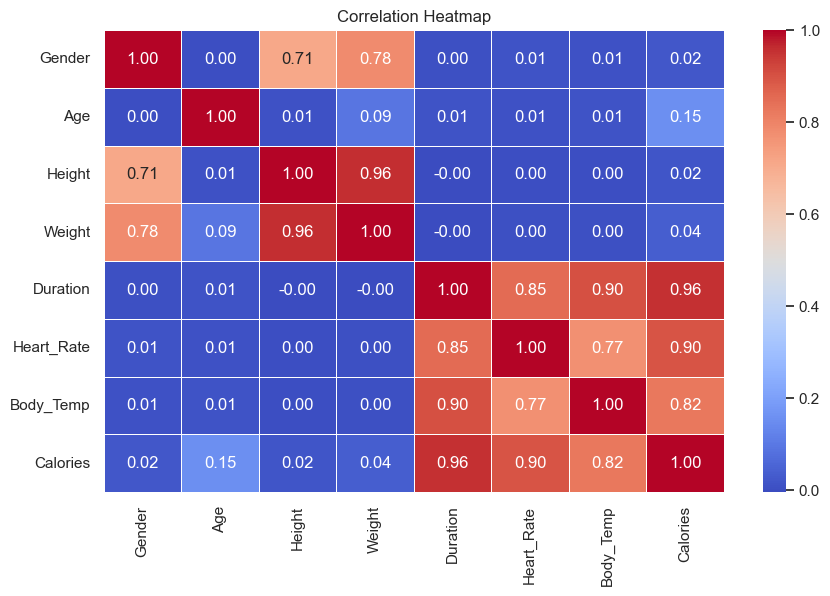

In [13]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df.drop(columns=["User_ID"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Correlation Heatmap:

● Calories burned is strongly correlated with:

1) Duration: Highly correlated with a coefficient of 0.96.

2) Heart Rate: Strong positive correlation with a coefficient of 0.90.

3) Body Temperature: Significant positive correlation with a coefficient of 0.82.

4) Weight: Moderate positive correlation with a coefficient of 0.04.

5) Gender, Age, and Height: Low correlations with coefficients of 0.02, 0.15, and 0.02, respectively.

● Height & Weight (0.96): Taller individuals tend to weigh more.

● Duration & Heart Rate (0.85): Longer exercise duration leads to higher heart rates.

● Duration & Body Temp (0.90): The longer a person exercises, the higher their body temperature.



# Preprosessing

In [14]:
# removing user_id column
df.drop(columns=["User_ID"],inplace=True) # removing unnecessary column

In [15]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [16]:
# Feature scaling
scaler = StandardScaler()   # nomalize feature values to a common scale
df[['Gender','Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp']]= scaler.fit_transform(df[['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp']])

In [17]:
import pickle
pickle.dump(scaler,open("scaling.pkl",'wb'))

In [18]:
df

Gender       Age    Height    Weight  Duration  Heart_Rate  \
0      1.007092  1.484726  1.089582  1.265909  1.619127    0.989404   
1     -0.992958 -1.342179 -0.593726 -0.995458 -0.183990   -0.158461   
2      1.007092  1.543620  0.318066  0.268247 -1.265861   -0.784569   
3     -0.992958 -0.517665  0.318066 -0.263839 -0.304198    0.467647   
4     -0.992958 -0.929922 -1.435380 -1.128480 -0.664821   -1.515029   
...         ...       ...       ...       ...       ...         ...   
14995 -0.992958 -1.342179  1.299996  0.733822 -0.544614   -0.367164   
14996 -0.992958 -0.929922 -0.663864 -0.662904 -1.145653   -1.097623   
14997 -0.992958  0.012379 -1.084691 -1.128480  0.056426   -0.575866   
14998  1.007092  2.073665  1.299996  1.465441 -1.626484   -1.201975   
14999  1.007092  1.190257 -0.102761  0.268247  0.296841   -0.367164   

       Body_Temp  Calories  
0       0.994023     231.0  
1       0.352342      66.0  
2      -1.701035      26.0  
3       0.609015      71.0  
4      -0.289338      35.0  
...          ...       ...  
14995   0.480679      45.0  
14996  -1.059355      23.0  
14997   0.095670      75.0  
14998  -2.214380      11.0  
14999   0.609015      98.0  

[15000 rows x 8 columns]

# Train Test and Split

In [19]:
# Train-test split
X = df.drop('Calories', axis=1)
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Check the shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12000, 7), (3000, 7), (12000,), (3000,))

# Linear Regression Model

In [21]:
# Model Building - Multiple Linear Regression
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Evaluate multiple regression
y_pred_multiple = model_multiple.predict(X_test)
print("Multiple Linear Regression R^2:", r2_score(y_test, y_pred_multiple)) # R² Score
print("MAE:", mean_absolute_error(y_test, y_pred_multiple)) # Mean Absolute Error  
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multiple)))  # Root Mean Squared Error

Multiple Linear Regression R^2: 0.9672937151257295
MAE: 8.441513553849704
RMSE: 11.48894014915288


# Ridge and Lasso Regression

In [22]:
#  Feature Engineering
# Add interaction term and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)
print("Ridge Regression R^2:", r2_score(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)
print("\nLasso Regression R^2:", r2_score(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Ridge Regression R^2: 0.9977153371154533
MAE: 2.2503561948752693
RMSE: 3.0365149428305194

Lasso Regression R^2: 0.997717212621472
MAE: 2.248889755786161
RMSE: 3.0352683319317393


# xgboost Model

In [23]:

# Initialize and train the XGBoost regressor model
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)  # R² Score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error  
mse = mean_squared_error(y_test, y_pred, squared=True)  # Mean Squared Error
rmse = mse ** 0.5 # Root Mean Squared Error

print("XGBoost Model R^2:",r2)
print("MAE:",mae)
print("RMSE:", rmse)


XGBoost Model R^2: 0.9988678909361673
MAE: 1.4981198125282924
RMSE: 2.1375116634132594


# Hyperparameter Tuning For XGBoost Model

In [24]:
# Define hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7, 10],  # Maximum depth of trees
    'subsample': [0.6, 0.8, 1.0],  # Fraction of data to train each tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features per tree
    'reg_lambda': [0, 0.1, 1, 10],  # L2 regularization (Ridge)
    'reg_alpha': [0, 0.1, 1, 10]  # L1 regularization (Lasso)
}

# Initialize XGBoost model
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=3,  # 3-fold cross-validation
    scoring='r2',  # Optimize for R^2 score
    n_jobs=-1,  # Use all CPU cores
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train model with best parameters
best_model = XGBRegressor(**best_params, objective="reg:squarederror", random_state=42)
best_model.fit(X_train, y_train)

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("\nBest Model Performance:")
print("R^2 Score:", r2_best)
print("Mean Absolute Error (MAE):", mae_best)
print("Root Mean Squared Error (RMSE):", rmse_best)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 1.0}

Best Model Performance:
R^2 Score: 0.9993107893650149
Mean Absolute Error (MAE): 1.0738476942380268
Root Mean Squared Error (RMSE): 1.6677860794358665


# Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)  # R² Score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error  
mse = mean_squared_error(y_test, y_pred) # Mean Squared Error  
rmse = mse ** 0.5 # Root Mean Squared Error

print("RandomForestRegressor Model R^2:",r2) 
print("MAE:",mae) 

print("RMSE:", rmse)

RandomForestRegressor Model R^2: 0.9982639772588144
MAE: 1.6913833333333332
RMSE: 2.646927612031227


# Hyperparameter Tuning For RandomForestRegressor Model

In [26]:
# Define hyperparameter grid for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features per tree
    'bootstrap': [True, False]  # Whether to use bootstrapping
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=10,  # Number of random combinations to test
    cv=3,  # 3-fold cross-validation
    scoring='r2',  # Optimize for R^2 score
    n_jobs=-1,  # Use all CPU cores
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Get best parameters
best_params_rf = random_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

# Train model with best parameters
best_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions using the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print("\nBest Random Forest Model Performance:")
print("R^2 Score:", r2_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}

Best Random Forest Model Performance:
R^2 Score: 0.9970001146592958
Mean Absolute Error (MAE): 2.1958998860247356
Root Mean Squared Error (RMSE): 3.479498770080419


In [27]:
# Traning and validation errors of all models.

from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), Ridge(),Lasso(), RandomForestRegressor(), XGBRegressor()]

for i in range(5):
    models[i].fit(X_train, y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(y_train, train_preds))

    val_preds = models[i].predict(X_test)
    print('Validation Error : ', mae(y_test, val_preds))
    print()

LinearRegression() : 
Training Error :  8.306790197742501
Validation Error :  8.441513553849704

Ridge() : 
Training Error :  8.30653794559697
Validation Error :  8.441184428623346

Lasso() : 
Training Error :  9.012232123625191
Validation Error :  9.147320357384725

RandomForestRegressor() : 
Training Error :  0.6688925
Validation Error :  1.7157699999999998

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             mult

Interpretation:
1) XGBoost: This model achieved the highest R² value (0.9992), indicating it explains most of the variance in the target variable. It also has the lowest MAE (0.0176) and low RMSE (0.0273), suggesting it has excellent predictive accuracy and minimal errors.

2) Random Forest Regressor: This model also performed exceptionally well with an R² of 0.9969, slightly lower than XGBoost. The error metrics (MAE of 0.0352 and RMSE of 0.0562) are also very low, indicating strong predictive performance.

3) Ridge Regression: This model showed strong performance with an R² of 0.9977. The MAE (0.0360) and RMSE (0.0486) are slightly higher than those of XGBoost and RandomForestRegressor, but it still performs quite well.

4) Lasso Regression: While still performing well, its R² (0.9962), MAE (0.0418), and RMSE (0.0623) are not as strong as the top three models.

5) Multiple Linear Regression: This model has the lowest R² (0.9673) and higher error metrics (MAE of 0.1352 and RMSE of 0.1840) compared to the others, indicating it is the least effective model for predicting calorie values in this context.

Conclusion:

Given the metrics above, XGBoost stands out as the best-suited model for predicting calorie values due to its highest R² value and the lowest error metrics. The Random Forest Regressor is a close second, also demonstrating strong performance.

In [28]:
import pickle

In [29]:
pickle.dump(best_model, open('calories_model.pkl', 'wb'))

In [30]:
p_m = pickle.load(open('calories_model.pkl', 'rb'))

In [31]:
p_m.predict(X_test)

array([172.71967 , 189.45749 ,  52.26011 , ..., 121.69289 ,  20.108849,
       215.85199 ], dtype=float32)